In [1]:
import sys, os
import numpy as np
import time, h5py

from utils import default_paths, nsd_utils, texture_utils, prf_utils
from plotting import plot_utils

from model_fitting import initialize_fitting 
import argparse
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [5]:
for subject in [1,2,3,4,5,6,7,8,999,998]:

    fn2load = os.path.join(default_paths.stim_labels_root,'S%d_realworldsize.npy'%subject)
    d = np.load(fn2load, allow_pickle=True).item()
    has_small = d['has_small']
    has_large = d['has_large']
    has_medium = d['has_medium']
    binary_labels = d['small-large']
    has_small_wholeimage = d['has_small_wholeimage']
    has_large_wholeimage = d['has_large_wholeimage']
    has_medium_wholeimage = d['has_medium_wholeimage']
    binary_labels_wholeimage = d['small-large_wholeimage']
    
    print(np.unique(np.array([has_large_wholeimage, has_small_wholeimage]).T,axis=0, return_counts=True))
    print(np.unique(binary_labels_wholeimage, return_counts=True))
    
    prf_ind = 600
    print(np.unique(np.array([has_large[:,prf_ind], has_small[:,prf_ind]]).T,axis=0, return_counts=True))
    print(np.unique(binary_labels[:,prf_ind], return_counts=True))
    
    print(np.sum(has_medium[:,prf_ind]))
    print(np.sum(has_medium_wholeimage))

(array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]]), array([2107, 4371, 2596,  926]))
(array([ 0.,  1., nan]), array([4371, 2596, 3033]))
(array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]]), array([2869, 3060, 2705, 1366]))
(array([ 0.,  1., nan]), array([3060, 2705, 4235]))
5280.0
4351.0
(array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]]), array([2097, 4301, 2689,  913]))
(array([ 0.,  1., nan]), array([4301, 2689, 3010]))
(array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]]), array([2792, 2975, 2762, 1471]))
(array([ 0.,  1., nan]), array([2975, 2762, 4263]))
5244.0
4351.0
(array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]]), array([2132, 4314, 2638,  916]))
(array([ 0.,  1., nan]), array([4314, 2638, 3048]))
(array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]]), array([2916, 2901, 2702, 1481]))
(array([ 0.,  1., nan]), array([2901, 2702, 4397]))
5236.0
4405.0
(array([[0., 0.],
    

In [17]:
ims2load = np.arange(0,1000)
# subject=1
subject=999
if subject<9:
    image_data = nsd_utils.get_image_data(subject)
elif subject==999:
    from utils import coco_utils
    image_data = coco_utils.load_indep_coco_images(n_pix=240)
image_data = nsd_utils.image_uncolorize_fn(image_data[ims2load,:,:,:])
# image_data = image_data[ims2use,:,:,:]
n_images = image_data.shape[0]

Initializing coco api...
loading annotations into memory...
Done (t=0.89s)
creating index...
index created!
loading annotations into memory...
Done (t=22.16s)
creating index...
index created!
Initializing coco api...
loading annotations into memory...
Done (t=0.68s)
creating index...
index created!
loading annotations into memory...
Done (t=18.37s)
creating index...
index created!

loading images from /user_data/mmhender/nsd/stimuli/Indep_set_stimuli_240.h5py



In [20]:
fn2load = os.path.join(default_paths.stim_labels_root,'S%d_realworldsize.npy'%subject)
print(fn2load)
d = np.load(fn2load, allow_pickle=True).item()
has_small = d['has_small']
has_large = d['has_large']
has_medium = d['has_medium']
binary_labels = d['small-large']
has_small_wholeimage = d['has_small_wholeimage']
has_large_wholeimage = d['has_large_wholeimage']
has_medium_wholeimage = d['has_medium_wholeimage']
binary_labels_wholeimage = d['small-large_wholeimage']

/user_data/mmhender/nsd/labels/S999_realworldsize.npy


In [21]:
print(np.unique(np.array([has_large_wholeimage, has_small_wholeimage]).T,axis=0, return_counts=True))
print(np.unique(binary_labels_wholeimage, return_counts=True))

prf_ind = 600
print(np.unique(np.array([has_large[:,prf_ind], has_small[:,prf_ind]]).T,axis=0, return_counts=True))
print(np.unique(binary_labels[:,prf_ind], return_counts=True))

print(np.sum(has_medium[:,prf_ind]))
print(np.sum(has_medium_wholeimage))

(array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]]), array([2008, 4710, 2268, 1014]))
(array([ 0.,  1., nan]), array([4710, 2268, 3022]))
(array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]]), array([3005, 3105, 2402, 1488]))
(array([ 0.,  1., nan]), array([3105, 2402, 4493]))
5622.0
4239.0


In [22]:
prf_ind = 100;
which_prf_grid=5
models = initialize_fitting.get_prf_models(which_grid=which_prf_grid)    

prf_params = models[prf_ind,:]    
x,y,sigma = prf_params
n_pix = 240
aperture=1.0
prf = prf_utils.gauss_2d(center=[x, y], sd=sigma, patch_size=n_pix, aperture=1.0, \
                                      dtype=np.float32)
prf_mask = prf_utils.get_prf_mask(center=[x, y], sd=sigma, patch_size=n_pix)
mask_sum = np.sum(prf_mask)
min_pix_req = np.ceil(mask_sum*0.10)

n_prf_sd_out = 2
prf_bbox = texture_utils.get_bbox_from_prf(prf_params, (n_pix, n_pix), n_prf_sd_out, \
                                                   min_pix=None, verbose=False, force_square=False)

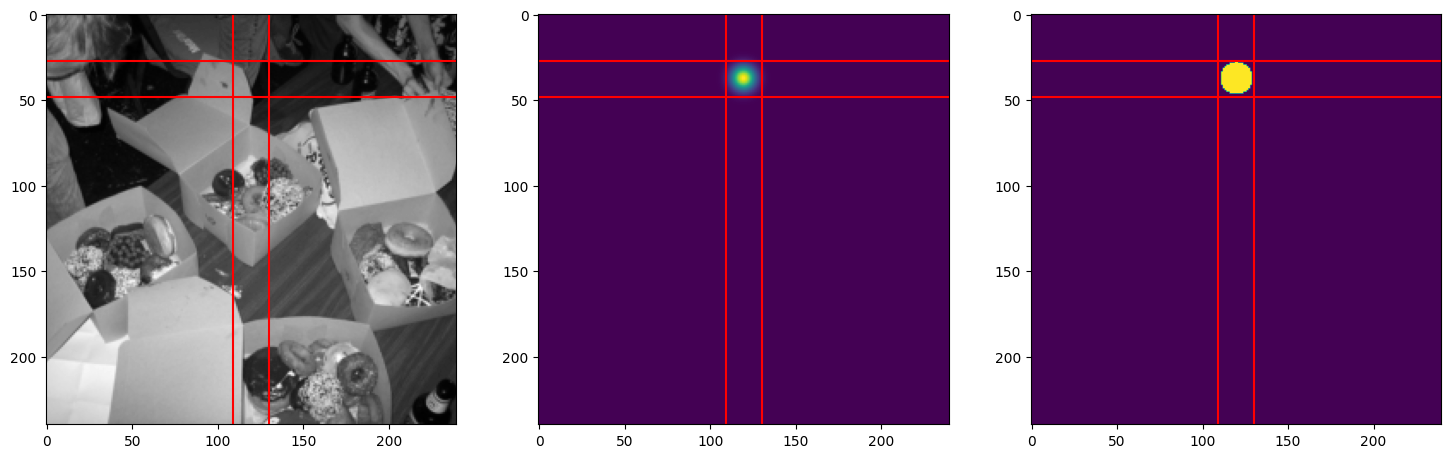

In [23]:
# Plot pRF bounding boxes

ii = np.where(has_large[:,prf_ind]==1)[0][0]
nsd_image = np.moveaxis(image_data[ii,:,:,:], [0],[2])

plt.figure(figsize=(18,6));
plt.subplot(1,3,1)
plt.imshow(nsd_image, cmap='gray')
# show the prf on top to make sure it is where it should be
plt.axhline([prf_bbox[0]],color='r')
plt.axhline([prf_bbox[1]],color='r')
plt.axvline([prf_bbox[2]],color='r')
plt.axvline([prf_bbox[3]],color='r')

plt.subplot(1,3,2)
plt.imshow(prf)
# plt.colorbar()
plt.axhline([prf_bbox[0]],color='r')
plt.axhline([prf_bbox[1]],color='r')
plt.axvline([prf_bbox[2]],color='r')
plt.axvline([prf_bbox[3]],color='r')

plt.subplot(1,3,3)
plt.imshow(prf_mask)
plt.axhline([prf_bbox[0]],color='r')
plt.axhline([prf_bbox[1]],color='r')
plt.axvline([prf_bbox[2]],color='r')
plt.axvline([prf_bbox[3]],color='r')

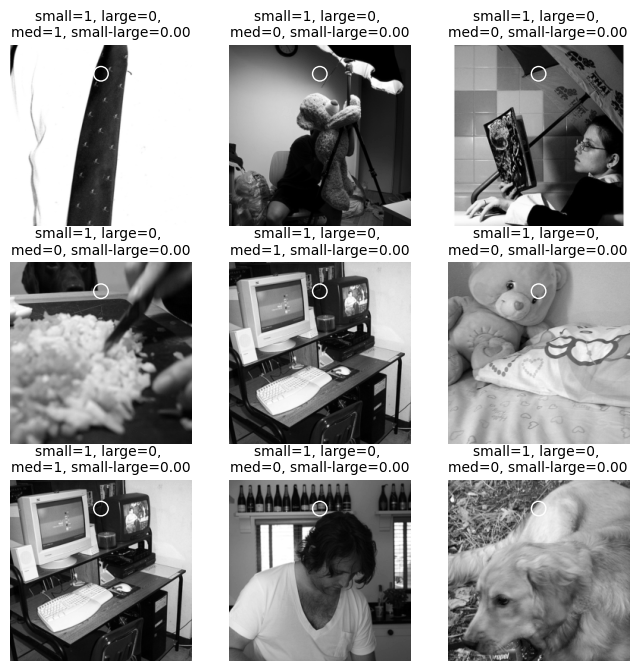

In [24]:
# plot examples - "has small" patches
plot_utils.set_all_font_sizes(10)
ims2use = np.where((has_small[:,prf_ind]==1) & (has_large[:,prf_ind]==0) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    
    plt.title('small=%d, large=%d, \nmed=%d, small-large=%.2f'%(has_small[im, prf_ind], \
                                                             has_large[im, prf_ind],\
                                                            has_medium[im, prf_ind], \
                                                           binary_labels[im, prf_ind]))

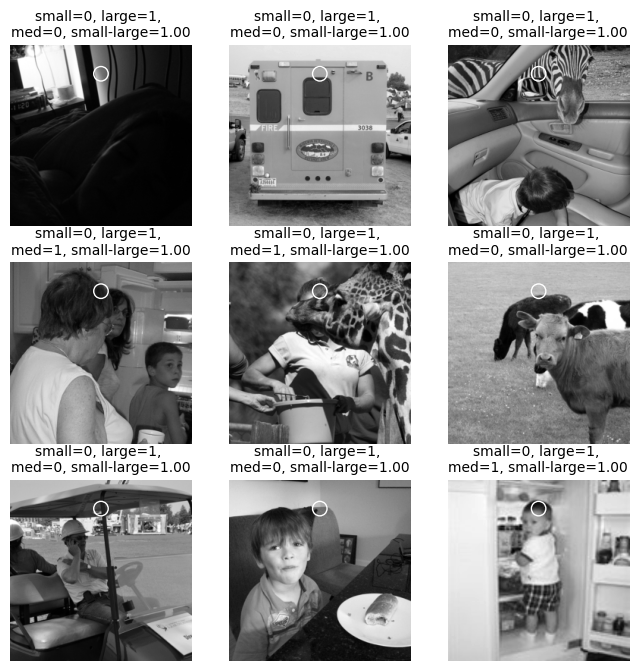

In [25]:
# plot examples - "has large" patches
plot_utils.set_all_font_sizes(10)
ims2use = np.where((has_small[:,prf_ind]==0) & (has_large[:,prf_ind]==1) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    
    plt.title('small=%d, large=%d, \nmed=%d, small-large=%.2f'%(has_small[im, prf_ind], \
                                                             has_large[im, prf_ind],\
                                                            has_medium[im, prf_ind], \
                                                           binary_labels[im, prf_ind]))

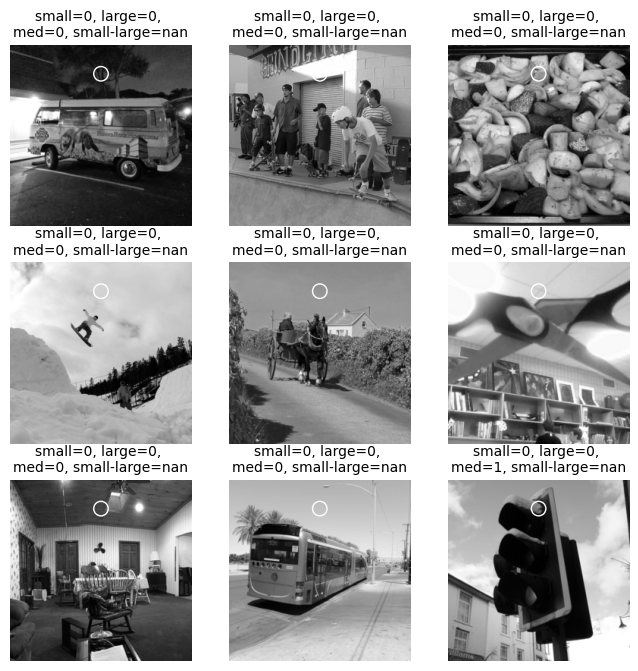

In [26]:
# plot examples - "has neither" patches
plot_utils.set_all_font_sizes(10)
ims2use = np.where((has_small[:,prf_ind]==0) & (has_large[:,prf_ind]==0) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    
    plt.title('small=%d, large=%d, \nmed=%d, small-large=%.2f'%(has_small[im, prf_ind], \
                                                             has_large[im, prf_ind],\
                                                            has_medium[im, prf_ind], \
                                                           binary_labels[im, prf_ind]))

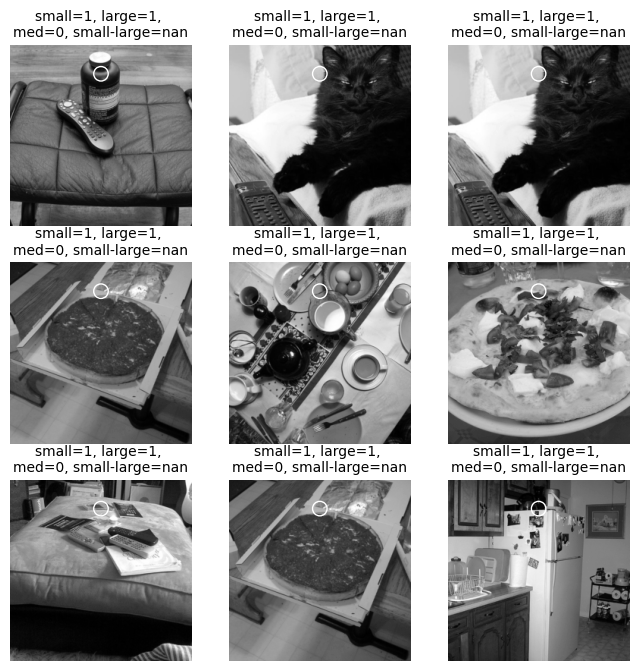

In [27]:
# plot examples - "has both" patches
plot_utils.set_all_font_sizes(10)
ims2use = np.where((has_small[:,prf_ind]==1) & (has_large[:,prf_ind]==1) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    
    plt.title('small=%d, large=%d, \nmed=%d, small-large=%.2f'%(has_small[im, prf_ind], \
                                                             has_large[im, prf_ind],\
                                                            has_medium[im, prf_ind], \
                                                           binary_labels[im, prf_ind]))

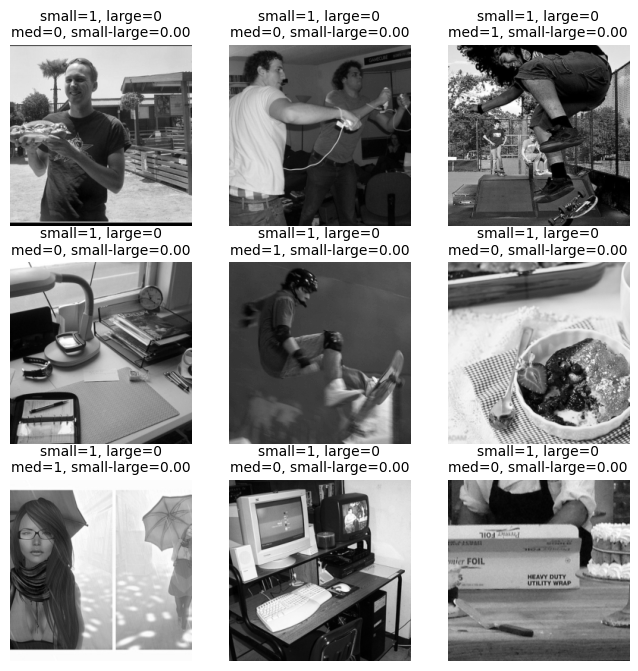

In [28]:
# plot examples - "has small" whole images

ims2use = np.where((has_small_wholeimage==1) & (has_large_wholeimage==0) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    plt.axis('off')
    
    plt.title('small=%d, large=%d\nmed=%d, small-large=%.2f'%\
                         (has_small_wholeimage[im],has_large_wholeimage[im], \
                         has_medium_wholeimage[im], binary_labels_wholeimage[im]))

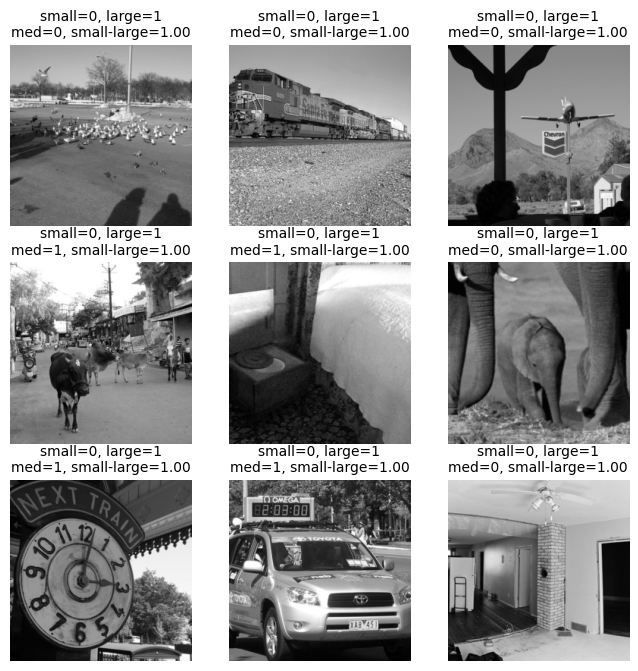

In [29]:
# plot examples - "has large" whole images

ims2use = np.where((has_small_wholeimage==0) & (has_large_wholeimage==1) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    plt.axis('off')
    
    plt.title('small=%d, large=%d\nmed=%d, small-large=%.2f'%\
                         (has_small_wholeimage[im],has_large_wholeimage[im], \
                         has_medium_wholeimage[im], binary_labels_wholeimage[im]))

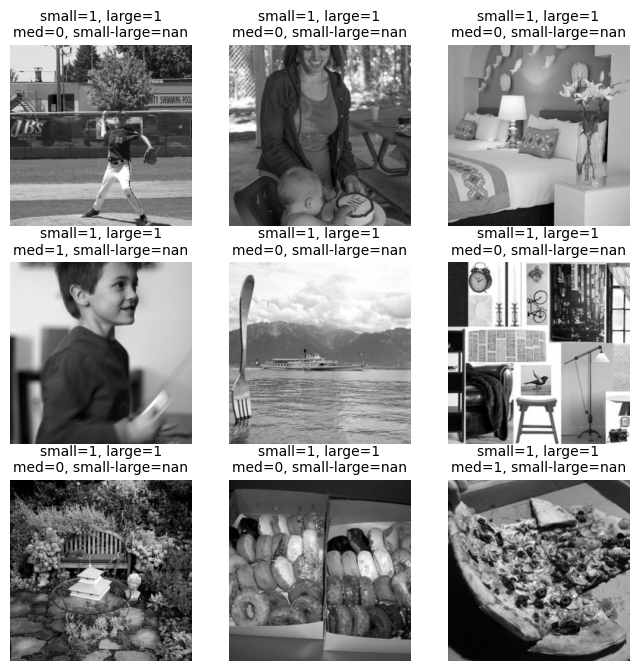

In [31]:
# plot examples - "has both" whole images

ims2use = np.where((has_small_wholeimage==1) & (has_large_wholeimage==1) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    plt.axis('off')
    
    plt.title('small=%d, large=%d\nmed=%d, small-large=%.2f'%\
                         (has_small_wholeimage[im],has_large_wholeimage[im], \
                         has_medium_wholeimage[im], binary_labels_wholeimage[im]))

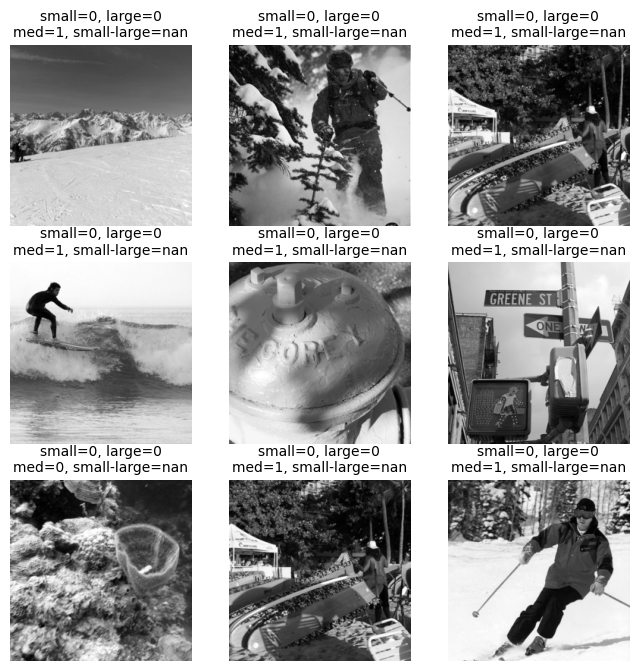

In [32]:
# plot examples - "has neither" whole images

ims2use = np.where((has_small_wholeimage==0) & (has_large_wholeimage==0) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    plt.axis('off')
    
    plt.title('small=%d, large=%d\nmed=%d, small-large=%.2f'%\
                         (has_small_wholeimage[im],has_large_wholeimage[im], \
                         has_medium_wholeimage[im], binary_labels_wholeimage[im]))